<h3>Chapter 1: Mock Social Network</h3>

In [1]:
# Our data here is a list of users with IDs and names, as well as friendship tuples

users = [
        { "id": 0, "name": "Hero" },
        { "id": 1, "name": "Dunn" },
        { "id": 2, "name": "Sue" },
        { "id": 3, "name": "Chi" },
        { "id": 4, "name": "Thor" },
        { "id": 5, "name": "Clive" },
        { "id": 6, "name": "Hicks" },
        { "id": 7, "name": "Devin" },
        { "id": 8, "name": "Kate" },
        { "id": 9, "name": "Klein" }
]

friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

In [2]:
# Create a list of friends for each user
for user in users:
    user["friends"] = []

In [3]:
users

[{'id': 0, 'name': 'Hero', 'friends': []},
 {'id': 1, 'name': 'Dunn', 'friends': []},
 {'id': 2, 'name': 'Sue', 'friends': []},
 {'id': 3, 'name': 'Chi', 'friends': []},
 {'id': 4, 'name': 'Thor', 'friends': []},
 {'id': 5, 'name': 'Clive', 'friends': []},
 {'id': 6, 'name': 'Hicks', 'friends': []},
 {'id': 7, 'name': 'Devin', 'friends': []},
 {'id': 8, 'name': 'Kate', 'friends': []},
 {'id': 9, 'name': 'Klein', 'friends': []}]

In [4]:
for i, j in friendships:
    users[i]["friends"].append(users[j])
    users[j]["friends"].append(users[i])

In [5]:
# Now we can easily answer questions like, "what's the average number of connections?"
def number_of_friends(user):
    return len(user["friends"])

In [6]:
number_of_friends(users[0])

2

In [7]:
total_connections = sum(number_of_friends(user) for user in users)
total_connections

24

In [8]:
avg_num_connections = total_connections / len(users)
avg_num_connections

2.4

In [9]:
# Find the most connected people (greatest number of friends)
num_friends_by_user_id = [(user['id'], number_of_friends(user)) for user in users]
sorted(num_friends_by_user_id, key=lambda i : i[1], reverse=True)

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

In [10]:
# This is a way of identifying who is 'central' to the network -- this is the the network
# metric called 'degree centrality'
# We'll investigate networks in more detail in a later chapter

In [11]:
# Let's try to build a friend recommender based on a user's friends
def friends_of_friends_ids_bad(user):
    # foaf = 'friend of a friend'
    return [foaf['id'] for friend in user['friends']
           for foaf in friend['friends']]

In [12]:
# This includes user 0 twice since user 0 is friends with both of his friends
# Users 1 and 2 are already friends with user 0, and includes user 3 twice

friends_of_friends_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [13]:
# User 0 has 2 friends -- user 1 and user 2

print([friend['id'] for friend in users[1]['friends']])
print([friend['id'] for friend in users[2]['friends']])

[0, 2, 3]
[0, 1, 3]


In [14]:
# Let's exclude people already known to the user and produce a count of mutual friends

from collections import Counter

def not_the_same(user, other_user):
    return user['id'] != other_user['id']

def not_friends(user, other_user):
    """other_user doesn't appear in user's friends list"""
    return all(not_the_same(friend, other_user)
              for friend in user['friends'])

def friends_of_friends_ids(user):
    """return a user id with a count of how many mutual friends you share"""
    return Counter(foaf['id'] for friend in user['friends']
                  for foaf in friend['friends']
                  if not_the_same(user, foaf) and not_friends(user, foaf))

In [15]:
# This means that user 3 has 2 mutual friends with user 0, and 1 mutual friend with user 5

friends_of_friends_ids(users[3])

Counter({0: 2, 5: 1})

In [16]:
# Add in some user interests data, a list of tuples with (user_id, interest)
# We can see that users 4 and 7 have no friends in common, but share an interest in ML

interests = [
        (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
        (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
        (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
        (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
        (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
        (3, "statistics"), (3, "regression"), (3, "probability"),
        (4, "machine learning"), (4, "regression"), (4, "decision trees"),
        (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
        (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
        (6, "probability"), (6, "mathematics"), (6, "theory"),
        (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
        (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
        (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
        (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

In [17]:
# Find users with a certain interest

def users_with_interest(target_interest):
    return [user_id for user_id, interest in interests
            if interest == target_interest]

In [18]:
users_with_interest('machine learning')

[4, 7]

In [19]:
# This works but isn't very efficient
from collections import defaultdict

# keys are interests, values are lists of user_ids associated with that interest
user_ids_by_interest = defaultdict(list)
print(user_ids_by_interest)

for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
    
user_ids_by_interest

defaultdict(<class 'list'>, {})


defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'decision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programming languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': 

In [20]:
# Create another dict with users to interests

interests_by_user_id = defaultdict(list)
for user_id, interest in interests:
    interests_by_user_id[user_id].append(interest)
    
interests_by_user_id

defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'scikit-learn',
              'scipy',
              'numpy',
              'statsmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'decision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'programming languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learning',
       

In [21]:
# Now we can easily find who has the most interests in common with a given user:
# 1. Iterate over the users interests
# 2. Iterate over other users to find who have that same interest
# 3. Keep track of how many times we see each other user

def most_interests_in_common(user):
    users_seen = []
    
    for user_interest in interests_by_user_id[user['id']]:
        for other_user in user_ids_by_interest[user_interest]:
            users_seen.append(other_user)
    return Counter(users_seen)

In [22]:
most_interests_in_common(users[0])

Counter({0: 7, 9: 3, 8: 1, 1: 2, 5: 1})

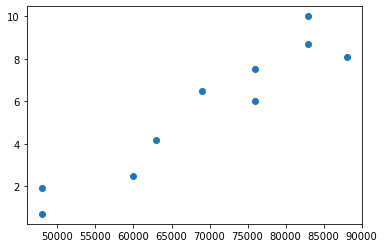

In [23]:
# Let's use some salary data now
import matplotlib.pyplot as plt

salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

plt.scatter(*zip(*salaries_and_tenures))

In [24]:
# Looks like people with more experience tend to earn more

# key is year, value is list of salaries
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

avg_salary_by_tenure = {
    tenure : sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

# None of the users have same tenure, so it's just reporting the individual users' salaries
avg_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [25]:
# Bucket the tenures 

def tenure_bucket(tenure):
    if tenure < 2:
        return 'less than two'
    elif tenure < 5:
        return 'between two and five'
    else:
        return 'more than five'

# key is tenure bucket, val is salaries for that bucket
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

salary_by_tenure_bucket

defaultdict(list,
            {'more than five': [83000, 88000, 76000, 69000, 76000, 83000],
             'less than two': [48000, 48000],
             'between two and five': [60000, 63000]})

In [26]:
avg_salary_by_bucket = {
    tenure_bucket : sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

avg_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}

In [27]:
# Most common interests -- basic analysis of most common words found in user interest data
# 1. Lowercase each interest in case users use different case
# 2. Split the words
# 3. Count the frequency of each word

words_and_counts = Counter(word for user, interest in interests
                           for word in interest.lower().split())

for word, count in words_and_counts.most_common():
    if count > 1:
        print(word, count)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
